Материалы: https://yarolika00.notion.site/Spot-the-bot-Information-for-Spot-the-bot-b03e2b3e31794caeaa43936d47d88c08

# Язык коми

Материалы:
* https://komi-zyrian.web-corpora.net/ - можно написать автору или как-то иначе попросить использовать
* https://dict.fu-lab.ru/ - онлайн-словари
* https://github.com/timarkh/uniparser-grammar-komi-zyrian - морфологический анализатор

In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import json

In [2]:
def GetTextLinks(page_link):
    main_link = 'https://komikyv.org/'

    text_links = []

    while True:
        soup = BeautifulSoup(session.get(page_link).text, 'html.parser')

        texts_on_page = soup.find_all('td', {'id': 'tht1'})
        for text_on_page in texts_on_page:
            text_link = text_on_page.find('a').attrs['href']
            text_links.append(main_link + text_link)

        next_html = soup.find('li', {'class': 'next'})
        if next_html:
            page_link = main_link + next_html.find('a').attrs['href']
        else:
            break

    return text_links

In [3]:
def GetTexts(text_links):
    text_dicts = []
    for link in tqdm(text_links):
        soup = BeautifulSoup(session.get(link).text, 'html.parser')
        metadata = soup.find('div', {'class': 'bloknot-v'})

        title = soup.find('span', {'class': 'rdf-meta element-hidden'}).attrs['content']

        author = ''
        author_raw = metadata.find('div', {'class': 'field field-name-field-autor field-type-entityreference field-label-above'})
        if author_raw:
            author = author_raw.find('div', {'class': 'field-item even'}).text

        genre = ''
        genre_raw = metadata.find('div', {'class': 'field field-name-field-janr field-type-taxonomy-term-reference field-label-above'})
        if genre_raw:
            genre = genre_raw.find('div', {'class': 'field-item even'}).text

        source = ''
        source_raw = metadata.find('div', {'class': 'field field-name-field-istochnik field-type-taxonomy-term-reference field-label-above'})
        if source_raw:
            source = source_raw.find('div', {'class': 'field-item even'}).text

        place = ''
        place_raw = metadata.find('div', {'class': 'field field-name-field-moydanin field-type-taxonomy-term-reference field-label-above'})
        if place_raw:
            place = place_raw.find('div', {'class': 'field-item even'}).text

        text = soup.find('div', {'class': 'padd'}).get_text()

        text_dict = {'link': link, 'title': title, 'author': author, 'genre': genre, 'place': place, 'source': source, 'text': text}
        text_dicts.append(text_dict)

    return text_dicts

In [4]:
session = requests.session()

## Раздел Проза

In [ ]:
prose_first_link = 'https://komikyv.org/kpv/library?field_category_tid_1=Проза&field_perevodl_tid=Нет'
prose_links = GetTextLinks(prose_first_link)
len(prose_links)

1929

In [ ]:
with open('proza_links.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(prose_links))

In [ ]:
prose_dicts = GetTexts(prose_links)

In [ ]:
with open('proza_texts.json', 'w') as file:
    json.dump(prose_dicts, file, ensure_ascii=False)

In [161]:
df = pd.read_json(r"komi\proza_texts.json", encoding="UTF-8")
df.head()

,link,title,author,genre,place,source,text
0,https://komikyv.org//kpv/content/%D0%B0-%D0%B2...,А вӧрыс ыпъялӧ-сотчӧ,Белых Иван,Висьт,Сыктывкар,Важыс уськӧдчывлӧ вӧтӧн (2005),\n\nА ВӦРЫС ЫПЪЯЛӦ-СОТЧӦ\n\n\t \n\n\tКолӧ жӧ в...
1,https://komikyv.org//kpv/content/%D0%B0-%D0%BA...,А комиясыд медсюсьӧсь,Парма Вань,Висьт,,Винегрет (2011),\n\nА КОМИЯСЫС МЕДСЮСЬӦСЬ\n\nКлуб дорын кино в...
2,https://komikyv.org//kpv/node/30420,А поезд мунӧ...,Афанасьев Евгений,Висьт,,Войвыв кодзув (1999 №7),\n\nА ПОЕЗД МУНӦ...\n\nКольӧм гожӧмӧ ас чужан ...
3,https://komikyv.org//kpv/node/32723,Абу йӧй,Лодыгин Василий,Мойд,,Паса шор (1995),"\n\nАБУ ЙӦЙ\n\nКатшалы, югыд синъяснас потшӧс ..."
4,https://komikyv.org//kpv/contents/abu-moyd-zbyl,"Абу мойд, а збыль",Коданёв Иван,Висьт,,Ягъяслӧн йӧлӧга шы (1984),"\n\nАБУ МОЙД, А ЗБЫЛЬ\n\nКор поезд воис Эжваӧ,..."


In [163]:
# рассматриваем только тексты больше 100 слов, потому что есть такая статья Громов, ... ....

print(df.shape)
df['words'] = df['text'].apply(lambda x: len(x.split()))
prose_texts = df[df['words'] > 100]
prose_texts.shape

(1929, 8)


(1872, 8)

In [164]:
prose_texts.to_csv("long_prose_texts.csv", index=False, encoding='utf-8')

## Раздел Драма

In [ ]:
drama_first_link = 'https://komikyv.org/kpv/library?field_category_tid_1=Драма&field_perevodl_tid=Нет'
drama_links = GetTextLinks(drama_first_link)
len(drama_links)

60

In [ ]:
with open('drama_links.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(drama_links))

In [ ]:
drama_dicts = GetTexts(drama_links)

100%|██████████| 60/60 [00:21<00:00,  2.80it/s]


In [ ]:
with open('drama_texts.json', 'w') as file:
    json.dump(drama_dicts, file, ensure_ascii=False)

In [158]:
df = pd.read_json(r"komi\drama_texts.json", encoding="UTF-8")
df.head()

,link,title,author,genre,place,source,text
0,https://komikyv.org//kpv/node/31394,Августын,Козлова Елена,Ӧти юкӧна пьеса,,Войвыв кодзув (1988. № 2),\n\nАВГУСТЫН\n\nВорсысьяс:\nКостромин Михаил В...
1,https://komikyv.org//kpv/node/31006,Арт,Нёбдінса Виттор,Ворсантор,,Вабергач (1982),\n\nАРТ\nӦти торъя ворсантор\n\nЙӧз:\n\nВӧрпро...
2,https://komikyv.org//kpv/node/36070,Бурань,Лебедев Михаил,Сьылӧмӧн ворсантор,,Ордым (1929 № 1),\n\nБУРАНЬ\nСьылӧмӧн ворсантор важ коми йӧз ол...
3,https://komikyv.org//kpv/node/39996,Бушкола вояс,Иливапыс,Пьеса,,Бӧрйӧм гижӧдъяс (2009),\n\nБУШКОЛА ВОЯС\n\nДЕЙСТВУЙТӦНЫ:\n\nАндрей Ул...
4,https://komikyv.org//kpv/node/31001,Ва шыр,Нёбдінса Виттор,Теш,,Вабергач (1982),\n\nВА ШЫР\nКык торъя теш\n\nЙӧз:\n\nОТЕЧ ТАРА...


In [159]:
# рассматриваем только тексты больше 100 слов, потому что есть такая статья Громов, ... ....

print(df.shape)
df['words'] = df['text'].apply(lambda x: len(x.split()))
drama_texts = df[df['words'] > 100]
drama_texts.shape

(60, 7)


(59, 8)

In [160]:
drama_texts.to_csv("long_drama_texts.csv", index=False, encoding='utf-8')

## Раздел Фольклор

In [ ]:
folklore_first_link = 'https://komikyv.org/kpv/library?field_category_tid_1=Фольклор&field_perevodl_tid=Нет'
folklore_links = GetTextLinks(folklore_first_link)
len(folklore_links)

423

In [ ]:
with open('folklore_links.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(folklore_links))

In [ ]:
folklore_dicts = GetTexts(folklore_links)

100%|██████████| 423/423 [01:11<00:00,  5.92it/s]


In [ ]:
with open('folklore_texts.json', 'w') as file:
    json.dump(folklore_dicts, file, ensure_ascii=False)

In [155]:
df = pd.read_json(r"komi\folklore_texts.json", encoding="UTF-8")
df.head()

,link,title,author,genre,place,source,text
0,https://komikyv.org//kpv/node/35602,Айлы,,Бӧрдкыв,,Зырянскій край при епископахъ Пермскихъ и Зыря...,"\n\nАЙЛЫ\n\nЮгыд шондіӧй, айӧй!\nВердысь-удысь..."
1,https://komikyv.org//kpv/content/%D0%B0%D0%BB%...,Алӧй ленточка,,Сьыланкыв,,Войвыв кодзув (1993 № 3-4),"\nАЛӦЙ ЛЕНТОЧКА\n\nМенам вӧлі алӧй ленточка,\n..."
2,https://komikyv.org//kpv/node/30219,Аральӧ-пӧльӧ,,Мойд,Лымва,Коми мойдъяс (1991),\n\nАРАЛЬӦ-ПӦЛЬӦ\nВажӧн вӧлі старик гозъя. Нал...
3,https://komikyv.org//kpv/node/30218,Арӧй Дрӧй,,Мойд,Вомын,Коми мойдъяс (1991),\n\nАРӦЙ ДРӦЙ\nОлісны-вылісны крестьянин гозъя...
4,https://komikyv.org//kpv/node/30208,Арсень да чӧртъяс,,Мойд,Вомынбӧж,Коми мойдъяс (1991),\n\nАРСЕНЬ ДА ЧӦРТЪЯС\nВажӧн ӧти сиктын чукӧрт...


In [156]:
# рассматриваем только тексты больше 100 слов, потому что есть такая статья Громов, ... ....

print(df.shape)
df['words'] = df['text'].apply(lambda x: len(x.split()))
folklore_texts = df[df['words'] > 100]
folklore_texts.shape

(423, 7)


(284, 8)

In [157]:
folklore_texts.to_csv("long_folklore_texts.csv", index=False, encoding='utf-8')

## Раздел Поэзия

In [ ]:
poetry_first_link = 'https://komikyv.org/kpv/library?field_category_tid_1=Поэзия&field_perevodl_tid=Нет'
poetry_links = GetTextLinks(poetry_first_link)
len(poetry_links)

7673

In [ ]:
with open('poetry_links.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(poetry_links))

In [ ]:
poetry_dicts = GetTexts(poetry_links)

100%|██████████| 7673/7673 [35:17<00:00,  3.62it/s]


In [ ]:
with open('poetry_texts.json', 'w') as file:
    json.dump(poetry_dicts, file, ensure_ascii=False)

In [150]:
df = pd.read_json(r"komi\poetry_texts.json", encoding="UTF-8")

In [151]:
df.head()

,link,title,author,genre,place,source,text
0,https://komikyv.org//kpv/node/40865,"""А кор ывлаыс ланьтас...""",Касеева Клавдия,Кывбур,,Вын (2022),\n\n* * *\n\nА кор ывлаыс ланьтас\nДа сынӧдас ...
1,https://komikyv.org//kpv/node/40846,"""бабъяс печкӧны...""",Касеева Клавдия,Кывбур,,Вын (2022),\n\n* * *\n\nбабъяс печкӧны\nолӧм вурун.\nстав...
2,https://komikyv.org//kpv/node/40965,"""Босьт, шуӧ, гезсӧ да лок...""",Карманова Ксения,Кывбур,,Вын (2022),"\n\n* * *\n\nБосьт, шуӧ, гезсӧ да лок,\nТэнад ..."
3,https://komikyv.org//kpv/node/40835,"""Быттьӧ кытчӧ он видзӧдлы...""",Касеева Клавдия,Кывбур,,Вын (2022),\n\n* * *\n\nБыттьӧ кытчӧ он видзӧдлы —\nГӧгӧр...
4,https://komikyv.org//kpv/node/40967,"""Войся пемыд енэжын ӧтка кодзув...""",Карманова Ксения,Кывбур,,Вын (2022),\n\n* * *\n\nВойся пемыд енэжын ӧтка кодзув......


In [152]:
# рассматриваем только тексты больше 100 слов, потому что есть такая статья Громов, ... ....

print(df.shape)
df['words'] = df['text'].apply(lambda x: len(x.split()))
poetry_texts = df[df['words'] > 100]
poetry_texts.shape

(7673, 7)


(1999, 8)

In [153]:
poetry_texts.to_csv("long_poetry_texts.csv", index=False, encoding='utf-8')

## Результаты

* Проза: 1872
* Драма: 59
* Фольклор: 284
* Поэзия: 1999

Всего: 4214

## Объединение коми текстов разных жанров в единый корпус

In [125]:
import json


with open(r"komi\poetry_texts.json", encoding="UTF-8") as file:
    poetry_texts = json.load(file)

with open(r"komi\drama_texts.json", encoding="UTF-8") as file:
    drama_texts = json.load(file)

with open(r"komi\proza_texts.json", encoding="UTF-8") as file:
    proza_texts = json.load(file)

with open(r"komi\folklore_texts.json", encoding="UTF-8") as file:
    folklore_texts = json.load(file)

In [168]:
import pandas as pd

poetry_texts_df = pd.read_csv(r"komi\long_poetry_texts.csv", encoding="UTF-8")
poetry_texts_df["genre_wider"] = "poetry"

drama_texts_df = pd.read_csv(r"komi\long_drama_texts.csv", encoding="UTF-8")
drama_texts_df["genre_wider"] = "drama"

prose_texts_df = pd.read_csv(r"komi\long_prose_texts.csv", encoding="UTF-8")
prose_texts_df["genre_wider"] = "prose"

folklore_texts_df = pd.read_csv(r"komi\long_folklore_texts.csv", encoding="UTF-8")
folklore_texts_df["genre_wider"] = "folklore"

In [171]:
komi_fiction = pd.concat([poetry_texts_df, drama_texts_df, prose_texts_df, folklore_texts_df])
komi_fiction.head()

,link,title,author,genre,place,source,text,words,genre_wider
0,https://komikyv.org//kpv/node/40856,"""Дзурк-дзурк, дзурки-дзурк...""",Касеева Клавдия,Кывбур,NaN,Вын (2022),"\n\n* * *\n\nусьӧмаяслы, видзысьяслы да волысь...",148,poetry
1,https://komikyv.org//kpv/node/40830,"""катша-катша, китш-котш...""",Касеева Клавдия,Кывбур,NaN,Вын (2022),"\n\n* * *\n\nкатша-катша, китш-котш,\nтшӧті-ка...",108,poetry
2,https://komikyv.org//kpv/node/40990,"""Став сьӧлӧмсянь кӧсъя, мед быдӧнлы нимкодя ов...",Карманова Ксения,Кывбур,NaN,Войвыв кодзув (2020. №3),"\n\n* * *\n\nСтав сьӧлӧмсянь кӧсъя, мед быдӧнл...",111,poetry
3,https://komikyv.org//kpv/node/40834,"""тан кодкӧ эм на...""",Касеева Клавдия,Кывбур,NaN,Вын (2022),"\n\n* * *\n\n— тан кодкӧ эм на,\nме кындзи?\nм...",101,poetry
4,https://komikyv.org//kpv/node/40985,"""Тэ ставныскӧд ӧтлаын качӧдчин-лэбин...""",Карманова Ксения,Кывбур,NaN,Вын (2022),\n\n* * *\n\nТэ ставныскӧд ӧтлаын качӧдчин-лэб...,103,poetry


In [173]:
komi_fiction.to_csv("komi\komi_fiction.csv", index=False, encoding='utf-8')

## Лемматизация и прочий морфологический анализ художественных коми текстов

In [83]:
# !pip3 install uniparser-komi-zyrian

In [194]:
from string import punctuation
punctuation += '«»—'

import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from uniparser_komi_zyrian import KomiZyrianAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ttais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
a = KomiZyrianAnalyzer(mode='strict')

In [212]:
# для проверки анализа конкретных слов
ana = a.analyze_words("Бабаыс идрасис горт гӧгӧр, Отсасис мужиклы ытшкыны, куртны.".split())
ana[1]

[<Wordform object>
 идрасис
 идравны; 3,V,pass,pass_ysj,pst,sg
 идра-с-ис
 STEM-PASS-PST.3SG
 trans_ru	убрать (урожай),
 <Wordform object>
 идрасис
 идравны; 3,V,pass,pass_ysj,pst,sg,tr
 идра-с-ис
 STEM-PASS-PST.3SG
 trans_ru	прибрать; обрядить; убрать (урожай)]

In [97]:
def prepare_komi_text(text, a, punctuation):
    sents_draft = text.split('...')
    sents = []
    for sent_draft in sents_draft:
        sents.extend(sent_tokenize(sent_draft))
    sents_prepared = []
    for sent in sents:
        punct_removed = []
        for word in sent.split():
            word = word.strip(punctuation)
            if word:
                punct_removed.append(word)
        analyses = a.analyze_words(punct_removed)
        pos_dict = {'NUM': '0', 'PRO': '1', 'APRO': '2', 'ADVPRO': '3', 'PN': '4'}
        prepared = []
        for ana in analyses:
            wordform = ana[0].wf
            lemma = ana[0].lemma
            pos = ana[0].gramm.split(",")[0]
            #if the word is a number, we replace it with token for NUM
            if wordform.isdigit():
                prepared.append('0')
            #if the pos of the word is NUM, PRO, APRO, ADVPRO or PN
            #(see gramm tags here https://komi-zyrian.web-corpora.net/)
            #we replace it with the token
            elif pos in pos_dict:
                prepared.append(pos_dict[pos])
            elif lemma != "":
                #we replace word with its lemma
                prepared.append(lemma)
            else:
                #we mark unrecognized wordforms
                prepared.append('_' + wordform)
        sents_prepared.append(" ".join(prepared))
    return "\n".join(sents_prepared)

In [98]:
komi_fiction_df = pd.read_csv(r"komi\komi_fiction.csv", encoding="UTF-8")

In [99]:
from tqdm import tqdm
tqdm.pandas()

komi_fiction_df['lemmas'] = komi_fiction_df['text'].progress_apply(lambda x: prepare_komi_text(x, a, punctuation))

100%|██████████| 4214/4214 [1:17:26<00:00,  1.10s/it]  


In [100]:
komi_fiction_df.to_csv("komi\komi_fiction_prepared.csv", index=False, encoding='utf-8')

In [118]:
komi_fiction_df['unrecognized'] = komi_fiction_df['lemmas'].apply(lambda x: " ".join([word for word in x.split() if "_" in word]))
komi_fiction_df['lemmas_count'] = komi_fiction_df['lemmas'].apply(lambda x: len(x.split()))
komi_fiction_df['unrecognized_count'] = komi_fiction_df['unrecognized'].apply(lambda x: len(x.split()))

In [131]:
# процент нераспознанных слов
sum(komi_fiction_df['unrecognized_count']) / sum(komi_fiction_df['lemmas_count']) * 100

4.635969068814373

## Извлечение текстов для проверки консультантом

In [185]:
# print(komi_fiction_df.loc[2043, 'text'])
# print(komi_fiction_df.loc[2043, 'lemmas'])

In [179]:
komi_fiction_df[komi_fiction_df.genre_wider == "drama"].sample(3)

,link,title,author,genre,place,source,text,words,genre_wider,lemmas,unrecognized,lemmas_count,unrecognized_count
2031,https://komikyv.org//kpv/node/31007,Моль,Нёбдінса Виттор,Ворсантор,NaN,Вабергач (1982),\n\nМОЛЬ\nӦти торъя ворсантор\n\nЙӧз:\n\nМИКАЙ...,3928,drama,моль 0 торъя ворсантор йӧз Микайлӧ ар 0 коммун...,_18–19 _комсомолеч _54–55 _30–32 _КРИСАН _ЛАБО...,3869,191
2039,https://komikyv.org//kpv/node/35465,Пемыд пармаын (Шыпича),Сук Парма,Либретто,NaN,Тувсов кадын (1941),\n\nПЕМЫД ПАРМАЫН\n(Шыпича)\n\nВит серпаса дра...,7371,drama,пемыд парма шыпича 0 серпас драма ворсны 0\nЯр...,_Шонді-Ныв _Шараф _КЫВВОДЗ _Анук _пӧдсӧн _Анук...,7213,182
2043,https://komikyv.org//kpv/node/39992,Пӧсь сынӧд,Иливапыс,Пьеса,NaN,Бӧрйӧм гижӧдъяс (2009),\n\nПӦСЬ СЫНӦД\n\nВОРСЫСЬЯС:\n\nСавин — трестс...,10840,drama,пӧсь сын ворсны Савин трест представитель\nГуд...,_Красов _Красовлӧн _Кочев _Сокерин _Курыдкашин...,10781,997


## Создание корпуса художественных коми-текстов в виде файла .txt

In [60]:
komi_fiction_prepared_df = pd.read_csv(r"komi\komi_fiction_prepared.csv", encoding="UTF-8")

In [61]:
komi_fiction_prepared_df['lemmas'] = komi_fiction_prepared_df['lemmas'].apply(lambda x: x.strip())
with open(r'komi\komi_fiction_sent_corpus.txt', 'w', encoding='UTF-8') as file:
    file.write(komi_fiction_prepared_df['lemmas'].str.replace('\n\n', '\n').str.cat(sep='\n'))
with open(r'komi\komi_fiction_text_corpus.txt', 'w', encoding='UTF-8') as file:
    file.write(komi_fiction_prepared_df['lemmas'].str.replace('\n\n', ' ').str.replace('\n', ' ').str.cat(sep='\n'))

## TFIDF matrix и SVD на художественных коми-текстах

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import numpy as np

In [63]:
def make_matrix_W_list_of_words(corpus_path, min_df, max_df=None, token_pattern = None, use_idf = True):
  '''
  corpus_path - is a path to the corpus, where one line - one text

  min_df - is the minimum times (or fraction of the texts) a word must occur in the corpus

  max_df - is the maximum times (or fraction of the texts) a word must occur in the corpus
  if it is None, there are no upper bound

  token_pattern - alphabet, which will be considered. Usually can be all letters of the language and numbers
  if None all symbols will be OK

  use_idf - is bool value whether to use idf
  '''
  with open(corpus_path, 'r', encoding='UTF-8') as corpus_file:
        if token_pattern:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df, token_pattern=token_pattern, use_idf=use_idf)
        else:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df, use_idf=use_idf)
        data_vectorized = vectorizer.fit_transform(corpus_file)
  return data_vectorized, vectorizer.get_feature_names_out()

In [64]:
W, words_list  = make_matrix_W_list_of_words(r'komi\komi_fiction_text_corpus.txt', 1)

In [65]:
W.shape

(4214, 23200)

In [66]:
def apply_svd(W, k, output_folder):
  '''
  W - matrix texts x words
  k - the rank of the SVD, must be less than any dimension of W
  '''
  #Apply the SVD function
  u, sigma, vt = svds(W, k)

  #The function does not garantee, that the order of the singular values is descending
  #So, we need to dreate it by hand
  descending_order_of_inds = np.flip(np.argsort(sigma))
  u = u[:,descending_order_of_inds]
  vt = vt[descending_order_of_inds]
  sigma = sigma[descending_order_of_inds]

  #Checking that sizes are ok
  assert sigma.shape == (k,)
  assert vt.shape == (k, W.shape[1])
  assert u.shape == (W.shape[0], k)

  #Now, we'll save all the matrixes in folder (just in case)
  with open(output_folder + '\\' + str(k) + '_sigma_vt.npy', 'wb') as f:
        np.save(f, np.dot(np.diag(sigma), vt).T)
  with open(output_folder + '\\' +  str(k) + '_sigma.npy', 'wb') as f:
        np.save(f, sigma)
  with open(output_folder + '\\' +  str(k) + '_u.npy', 'wb') as f:
        np.save(f, u)
  with open(output_folder + '\\' +  str(k) + '_vt.npy', 'wb') as f:
        np.save(f, vt)
  return np.dot(np.diag(sigma), vt).T

In [67]:
vv = apply_svd(W, 1024, r'C:\Users\ttais\Documents\coursework 24-25\komi')

In [68]:
def create_dictionary(words_list, vv, output_file):
  dictionary = {}
  for word, vector in zip(words_list, vv):
    dictionary[word] = vector
  np.save(output_file, dictionary)
  return dictionary

In [69]:
dictionary = create_dictionary(words_list, vv, r'komi\dictionary.npy')

In [70]:
dictionary = np.load(r'komi\dictionary.npy', allow_pickle=True)[()]

## Создание датасета из художественных коми-текстов

In [92]:
def convert_text_to_vector(text, dictionary, n, m):
  #split the text into words
  text = text.strip().split()
  #It is the list for all the vectors in text
  text_vectors = []

  #inspect all n-grams in the text
  for i in range(len(text) - n + 1):
      #The list of vectors for words in the n-gram
      gram_vec = []
      #Let's look into every word of the n-gram
      for word in text[i:i+n]:
        #If current word is not in dictionary, we skip this n-gram
        if word not in dictionary:
          gram_vec = []
          break
        vec_ = dictionary[word][:m]
        gram_vec.append(vec_)

      #If the list of vectors is not correct, we skip the n-gram
      if len(gram_vec) != n or len(gram_vec[-1]) != m:
        continue

      text_vectors.append(np.array(gram_vec).flatten())
  return text_vectors

In [31]:
n = 2 #How long is the n-gram
m = 1024 #How long is a vector for every word
text = 'усьӧма видзны да воны дзуртны гусь парма чурк важ видзӧдны а 1 чужны челядь 1 нин эз сьывны да бур кыв удж эз ышавны эз гӧтырпу война бӧръя топавны сыв а 1 кольӧма вижавны гижны да 3 кывны тыш усьны тыш а чужны му виччыны да дзик 2 воны корны дитя локны кӧть лым локны дон но кольны 1 3 3 тувччавны бӧръя кокны и 1 оз аддзыны нин 1 кодйыны гу 3 пыдӧстӧм енэж окавны кӧдзавны му да кыа садьмыны а рыт вочасӧн ку 1 кыв кыдз во пыр дзуртны да сёрнитны важ парма чурк 1 кыв но бӧр ог воны но 2 воны май тӧлысь ойдыны юны и лэдзавны кор нэриник бадь пуны а 3 кӧ чужны му выв 1 ковны на ковны и дзик 2 воны бӧръя лым 1 парма воны'
text_vector = convert_text_to_vector(text, dictionary, n, m)

## Word2vec на художественных коми-текстах

In [32]:
import io

In [33]:
def load_corpus(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    documents = []
    for line in fin:
        documents.append(line.split())
    return documents

In [34]:
def save_dictionary(fname, dictionary, args):
    length, dimension = args
    fin = io.open(fname, 'w', encoding='utf-8')
    fin.write('%d %d\n' % (length, dimension))
    for word in dictionary:
        fin.write('%s %s\n' % (word, ' '.join(map(str, dictionary[word]))))

def load_dictionary(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    length, dimension = map(int, fin.readline().split())
    dictionary = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        dictionary[tokens[0]] = map(float, tokens[1:])
    return dictionary

In [38]:
documents = load_corpus(r'komi\komi_fiction_text_corpus.txt')
len(documents)

4214

In [39]:
%%time
from gensim.models import Word2Vec

dimension = 100
model = Word2Vec(sentences=documents, vector_size=dimension, min_count=1)

CPU times: total: 4.73 s
Wall time: 9.26 s


In [42]:
dictionary = {key : model.wv[key] for key in model.wv.key_to_index}
len(dictionary)

23501

In [47]:
model.wv.most_similar('ленточка')

[('гӧрдов', 0.8729685544967651),
 ('виж', 0.8573290705680847),
 ('пемыдгӧрд', 0.8465444445610046),
 ('кольквиж', 0.8459824323654175),
 ('чим', 0.8383888602256775),
 ('лӧставны', 0.8374735713005066),
 ('серӧдны', 0.8331573009490967),
 ('гӧрдоват', 0.8269049525260925),
 ('турунвиж', 0.8266408443450928),
 ('рудов', 0.8182281851768494)]

In [49]:
save_dictionary(r'komi\komi_fiction_word2vec_dictionary.txt', dictionary, (len(dictionary), dimension))

In [21]:
dictionary = load_dictionary(r'komi\komi_fiction_word2vec_dictionary.txt')

## Корпус прессы

# Основная часть курсовой

Корпус анекдотов: https://github.com/hemulitch/projectcorpora/tree/main

??: https://huggingface.co/spaces/dokster/jokerai/blob/main/app.py

## Функции и билиотеки для предобработки корпусов

In [12]:
# !pip install natasha

In [1]:
from natasha import (
    Segmenter, MorphVocab,
    NewsNERTagger,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)
import re

In [2]:
def prepare_russian_text(input_text):

    segmenter = Segmenter()
    emb = NewsEmbedding()
    morph_tagger = NewsMorphTagger(emb)
    ner_tagger = NewsNERTagger(emb)
    morph_vocab = MorphVocab()

    label_dict = {'NUM': '0', 'PRON': '1', 'PER': '2', 'LOC': '3', 'ORG': '4'}
    next_label_num = 5


    raw_text = input_text.replace('\n', ' ')
    raw_text = re.sub(r'\d+', '0' , raw_text)

    doc = Doc(raw_text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)

    for span in reversed(doc.ner.spans):
        if span.type not in label_dict:
            label_dict[span.type] = str(next_label_num)
            next_label_num += 1
        raw_text = "".join((raw_text[:span.start], label_dict[span.type], raw_text[span.stop:]))

    doc = Doc(raw_text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    prepared_text = ''
    prev_num = False
    for token in doc.tokens:

        if token.pos == 'NUM' and not token.text.isdigit():
            if not prev_num:
                prepared_text += '0'
                prepared_text += ' '
                prev_num = True
            continue

        prev_num = False

        if token.pos in label_dict:
            prepared_text += label_dict[token.pos]
            prepared_text += ' '

        elif token.pos != 'PUNCT':
                try:
                    token.lemmatize(morph_vocab)
                    prepared_text += token.lemma.lower()
                    prepared_text += ' '
                except Exception as ex:
                    prepared_text += token.text.lower()
                    prepared_text += ' '
    return prepared_text

## Получение корпуса шуток (готовый с huggingface)
https://huggingface.co/datasets/IgorVolochay/russian_jokes/resolve/main/dataset.csv?download=true

In [3]:
import pandas as pd

In [34]:
# jokes_df = pd.read_csv('https://huggingface.co/datasets/IgorVolochay/russian_jokes/resolve/main/dataset.csv?download=true')
# # запись в файл
# jokes_df.to_csv("jokes_df.csv", index=False, encoding='utf-8')

In [38]:
jokes_df = pd.read_csv('jokes_df.csv')
print(jokes_df.shape)
jokes_df.head()

(150553, 2)


,text,words_count
0,"- Зять, а ты знаешь, где найти того мужчину, к...",22
1,"После проведения акции ""К животным по-человече...",15
2,Штирлиц пришел домой и сразу завалился на боко...,12
3,"Комету нашли русские, а захватила ее Европа. И...",13
4,"- Мальчик, какой у тебя огромный рюкзачок, что...",19


In [35]:
jokes_df['words_count'] = jokes_df['text'].apply(lambda x: len(x.split()))

In [36]:
jokes_df['words_count'].mean()

24.702530006044384

In [37]:
jokes_df.to_csv("jokes_df.csv", index=False, encoding='utf-8')

## Предобработка корпуса шуток

### Подкорпус корпуса шуток

In [45]:
jokes_slice_df = jokes_df.loc[:1000]
jokes_slice_df.head()

,text,words_count
0,"- Зять, а ты знаешь, где найти того мужчину, к...",22
1,"После проведения акции ""К животным по-человече...",15
2,Штирлиц пришел домой и сразу завалился на боко...,12
3,"Комету нашли русские, а захватила ее Европа. И...",13
4,"- Мальчик, какой у тебя огромный рюкзачок, что...",19


In [46]:
from tqdm import tqdm
tqdm.pandas()

jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))

100%|██████████| 1001/1001 [16:23<00:00,  1.02it/s]
C:\Users\ttais\AppData\Local\Temp\ipykernel_2276\165010735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))


In [48]:
# запись в файл
jokes_slice_df.to_csv("jokes_slice_df.csv", index=False, encoding='utf-8')

### Итеративное расширение на весь корпус шуток

In [5]:
import pandas as pd

# чтение из файла
jokes_df = pd.read_csv('jokes_df.csv')
jokes_df.head()

,text,words_count
0,"- Зять, а ты знаешь, где найти того мужчину, к...",22
1,"После проведения акции ""К животным по-человече...",15
2,Штирлиц пришел домой и сразу завалился на боко...,12
3,"Комету нашли русские, а захватила ее Европа. И...",13
4,"- Мальчик, какой у тебя огромный рюкзачок, что...",19


In [11]:
from tqdm import tqdm
tqdm.pandas()

print(jokes_df.shape)
jokes_slice_df = jokes_df.loc[116001:126000]
jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))
jokes_slice_df.to_csv('jokes_slice_df.csv', mode='a', index=False, header=False, encoding='utf-8')
jokes_slice_df = jokes_df.loc[126001:136000]
jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))
jokes_slice_df.to_csv('jokes_slice_df.csv', mode='a', index=False, header=False, encoding='utf-8')
jokes_slice_df = jokes_df.loc[136001:146000]
jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))
jokes_slice_df.to_csv('jokes_slice_df.csv', mode='a', index=False, header=False, encoding='utf-8')
jokes_slice_df = jokes_df.loc[146001:]
jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))
jokes_slice_df.to_csv('jokes_slice_df.csv', mode='a', index=False, header=False, encoding='utf-8')

(150553, 2)


100%|██████████| 10000/10000 [2:36:51<00:00,  1.06it/s] 
C:\Users\ttais\AppData\Local\Temp\ipykernel_5180\3448826754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))
100%|██████████| 10000/10000 [2:35:51<00:00,  1.07it/s] 
C:\Users\ttais\AppData\Local\Temp\ipykernel_5180\3448826754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes_slice_df['preprocessed'] = jokes_slice_df['text'].progress_app

In [13]:
jokes_slice_df = pd.read_csv('jokes_slice_df.csv')
jokes_slice_df.shape

(150553, 3)

## Получение корпуса новостей по предложениям
(~новости из корпуса Taiga -> Small datasets -> Readability https://tatianashavrina.github.io/taiga_site/downloads)

In [53]:
# !pip install conllu

In [12]:
# from conllu import parse
# sentences = parse(news)

In [27]:
from razdel import tokenize, sentenize
import os

fnames = os.listdir(r"taiga_readability\texts")
fnames_slice = fnames[:100]
news = ""
for fname in fnames_slice:
    with open(rf"taiga_readability\texts\{fname}", "r", encoding="UTF-8") as file:
        news += file.read()

sentences = [_.text for _ in sentenize(news)][:1001]

In [29]:
news_sents_slice_df = pd.DataFrame(sentences, columns=["text"])
print(news_sents_slice_df.shape)
news_sents_slice_df.head()

(1001, 1)


,text
0,Сотрудники Венского медицинского университета ...
1,Работа опубликована в журнале Lancet.
2,"Плечевое сплетение дает начало нервам, которые..."
3,Травмы этого сплетения приводят к «функциональ...
4,Вместо попыток наладить иннервацию австрийские...


## Предобработка корпуса новостей по предложениям

In [30]:
from tqdm import tqdm
tqdm.pandas()

news_sents_slice_df['preprocessed'] = news_sents_slice_df['text'].progress_apply(lambda x: prepare_russian_text(x))

100%|██████████| 1001/1001 [20:03<00:00,  1.20s/it] 


In [31]:
# запись в файл
news_sents_slice_df.to_csv("news_sents_slice_df.csv", index=False, encoding='utf-8')

In [32]:
# чтение из файла
news_sents_slice_df = pd.read_csv('news_sents_slice_df.csv')
news_sents_slice_df.head()

,text,preprocessed
0,Сотрудники Венского медицинского университета ...,сотрудник 0 разработать технология 1 позволять...
1,Работа опубликована в журнале Lancet.,работа опубликовать в журнал 0
2,"Плечевое сплетение дает начало нервам, которые...",плечевой сплетение давать начало нерв 1 управл...
3,Травмы этого сплетения приводят к «функциональ...,травма этот сплетение приводить к функциональн...
4,Вместо попыток наладить иннервацию австрийские...,вместо попытка наладить иннервацию австрийский...


## Получение корпуса твитов

In [4]:
import pandas as pd
import re

In [ ]:
# https://www.kaggle.com/datasets/maximsuvorov/rutweetcorp?select=twitter_corpus.csv

tweets_df = pd.read_csv('twitter_corpus.csv.zip', compression='zip', lineterminator='\n')

In [ ]:
print(tweets_df.shape)
tweets_df.head()

In [5]:
tweets_df['words_count'] = tweets_df['text'].apply(lambda x: len(str(x).split()))

In [6]:
tweets_df['words_count'].mean()

9.655676588942796

In [7]:
print(tweets_df.shape)
tweets_df = tweets_df[tweets_df['words_count'] >= 12]
tweets_df.shape

(17639669, 2)


(5632872, 2)

In [9]:
tweets_df['words_count'].mean()

16.459988794348604

In [10]:
tweets_df.to_csv('tweets_12words_or_longer.csv', index=False, encoding='utf-8')

In [6]:
tweets_df = pd.read_csv('tweets_12words_or_longer.csv')

In [7]:
from tqdm import tqdm
tqdm.pandas()

tweets_df['prepared'] = tweets_df['text'].progress_apply(lambda x: re.sub('(@[A-za-z0-9:]+)|(RT)|(http[A-za-z0-9:\/\.]+)', '', x))

100%|██████████| 5632872/5632872 [00:39<00:00, 142434.56it/s]


In [8]:
tweets_df.head()

,text,words_count,prepared
0,"ЛЕНТА, Я СЕГОДНЯ ПОЛГОДА ДИРЕКШИОНЕЕЕЕР! С:\nХ...",13,"ЛЕНТА, Я СЕГОДНЯ ПОЛГОДА ДИРЕКШИОНЕЕЕЕР! С:\nХ..."
1,RT @v1ka_si: Меня удивляют эти маленькие девоч...,23,Меня удивляют эти маленькие девочки которые ...
2,"RT @digger2912: ""Кто то в углу сидит и погибае...",26,"""Кто то в углу сидит и погибает от голода, а..."
3,RT @_yowzah_: ммм\nпирожки от Ловетт\nих обожа...,15,ммм\nпирожки от Ловетт\nих обожает весь высш...
4,RT @to4inoji: фото Дмитрий Минц «O1 Propertie...,17,фото Дмитрий Минц «O1 Properties». проделки...


In [9]:
tweets_df.shape

(5632872, 3)

In [11]:
tweets_df.to_csv('tweets_12words_or_longer_prepared.csv', index=False, encoding='utf-8')

In [12]:
tweets_slice_df = tweets_df.loc[:1000]
tweets_slice_df.to_csv('tweets_12words_or_longer_slice_prepared.csv', index=False, encoding='utf-8')

## Предобработка корпуса твитов

In [3]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [4]:
tweets_slice_df = pd.read_csv('tweets_12words_or_longer_slice_prepared.csv')

tweets_slice_df['preprocessed'] = tweets_slice_df['prepared'].progress_apply(lambda x: prepare_russian_text(x))
# tweets_slice_df['preprocessed'] = tweets_slice_df['prepared'].apply(lambda x: prepare_russian_text(x))

100%|██████████| 1001/1001 [14:40<00:00,  1.14it/s]


In [5]:
tweets_slice_df.to_csv('tweets_slice_df.csv', index=False, encoding='utf-8')

In [6]:
tweets_slice_df = pd.read_csv('tweets_slice_df.csv')
tweets_slice_df.head()

,text,words_count,prepared,preprocessed
0,"ЛЕНТА, Я СЕГОДНЯ ПОЛГОДА ДИРЕКШИОНЕЕЕЕР! С:\nХ...",13,"ЛЕНТА, Я СЕГОДНЯ ПОЛГОДА ДИРЕКШИОНЕЕЕЕР! С:\nХ...",лента 1 сегодня полгода дирекшионеееер с хотя ...
1,RT @v1ka_si: Меня удивляют эти маленькие девоч...,23,Меня удивляют эти маленькие девочки которые ...,1 удивлять этот маленький девочка 1 нагло писа...
2,"RT @digger2912: ""Кто то в углу сидит и погибае...",26,"""Кто то в углу сидит и погибает от голода, а...",1 то в угол сидеть и погибать от голод а 1 еще...
3,RT @_yowzah_: ммм\nпирожки от Ловетт\nих обожа...,15,ммм\nпирожки от Ловетт\nих обожает весь высш...,ммм пирожок от 0 их обожать весь высокий свет ...
4,RT @to4inoji: фото Дмитрий Минц «O1 Propertie...,17,фото Дмитрий Минц «O1 Properties». проделки...,фото 0 0 проделка сын олигарх в центр 0 с минц


## Обучение SVD на корпусе новостей

In [89]:
from razdel import tokenize, sentenize
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [70]:
fnames = os.listdir(r"taiga_readability\texts")
news = []
for fname in tqdm(fnames):
    with open(rf"taiga_readability\texts\{fname}", "r", encoding="UTF-8") as file:
        news.append(file.read())

news_df = pd.DataFrame(news, columns=["text"])
print(news_df.shape)
news_df.head()

100%|██████████| 7696/7696 [01:13<00:00, 104.78it/s] 

(7696, 1)


,text
0,\nСотрудники Венского медицинского университет...
1,\nУченые из Университета Сапиенца в Риме предл...
2,\nСотрудники Массачусетского технологического ...
3,\nАмерикано-немецкая группа исследователей обн...
4,\nКрупная международная коллаборация исследова...


In [78]:
news_df['preprocessed'] = news_df['text'].progress_apply(lambda x: prepare_russian_text(x))

100%|██████████| 7696/7696 [2:12:28<00:00,  1.03s/it]  


In [79]:
news_df.to_csv("news_df.csv", index=False, encoding='utf-8')

In [80]:
news_df = pd.read_csv('news_df.csv')

In [90]:
with open('news_text_corpus.txt', 'w', encoding='UTF-8') as file:
    file.write(news_df['preprocessed'].str.cat(sep='\n'))

In [45]:
token_pattern = '[А-яЁё0-9\-]+'
W, words_list  = make_matrix_W_list_of_words('news_text_corpus.txt', 1, token_pattern=token_pattern)

In [48]:
W.shape

(7696, 39218)

In [51]:
vv = apply_svd(W, 100, r'C:\Users\ttais\Documents\coursework 24-25')

In [71]:
dictionary = create_dictionary(words_list, vv, r'news_dictionary.npy')

## Применение SVD

In [108]:
news_df = pd.read_csv('news_df.csv')
dictionary = np.load(r'news_dictionary.npy', allow_pickle=True)[()]

In [109]:
n = 1 #How long is the n-gram
m = 100 #How long is a vector for every word

news_df['SVD_vectors'] = news_df['preprocessed'].apply(lambda x: convert_text_to_vector(x, dictionary, n, m))

In [118]:
def SVD_euclidian_distances(vectors):
    text_euclidian_dist_vec = np.zeros(len(vectors) - 1)
    for i in range(1, len(vectors)):
        text_euclidian_dist_vec[i - 1] = np.linalg.norm(vectors[i] - vectors[i - 1])
    return text_euclidian_dist_vec

def SVD_distances_variation(vectors):
    text_dist = SVD_euclidian_distances(vectors)
    return np.var(text_dist)

def SVD_distances_max(text):
    text_dist = SVD_euclidian_distances(vectors)
    if np.any(text_dist):
        return np.max(text_dist)
    else:
        return None

In [ ]:
# поправить, или функции всё же от текстов, а не от уже полученных в датасете векторов делать

tweets_slice_df = pd.read_csv('tweets_slice_df.csv')
tweets_slice_df["variation"] = tweets_slice_df["preprocessed"].apply(text_distances_variation)
tweets_slice_df["max_dist"] = tweets_slice_df["preprocessed"].apply(text_distances_max)

jokes_slice_df = pd.read_csv('jokes_slice_df.csv')
jokes_slice_df["variation"] = jokes_slice_df["preprocessed"].apply(text_distances_variation)
jokes_slice_df["max_dist"] = jokes_slice_df["preprocessed"].apply(text_distances_max)

news_sents_slice_df = pd.read_csv('news_sents_slice_df.csv')
news_sents_slice_df["variation"] = news_sents_slice_df["preprocessed"].apply(text_distances_variation)
news_sents_slice_df["max_dist"] = news_sents_slice_df["preprocessed"].apply(text_distances_max)

## Предобученные word2vec для русского

**Fasttext документация**
https://fasttext.cc/docs/en/python-module.html

In [1]:
import io
import fasttext.util

In [2]:
def save_dictionary(fname, dictionary, args):
    length, dimension = args
    fin = io.open(fname, 'w', encoding='utf-8')
    fin.write('%d %d\n' % (length, dimension))
    for word in dictionary:
        fin.write('%s %s\n' % (word, ' '.join(map(str, dictionary[word]))))
        
def load_dictionary(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    length, dimension = map(int, fin.readline().split())
    dictionary = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        dictionary[tokens[0]] = map(float, tokens[1:])
    return dictionary

In [3]:
fasttext.util.download_model('ru', if_exists='ignore')

'cc.ru.300.bin'

In [4]:
model = fasttext.load_model('cc.ru.300.bin')

## Подсчёт дисперсии предложений новостей, твитов и анекдотов на основе векторов word2vec

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon

In [6]:
def text_euclidian_distances(text):
    text_list = text.split()
    text_euclidian_dist_vec = np.zeros(len(text_list) - 1)
    for i in range(1, len(text_list)):
        text_euclidian_dist_vec[i - 1] = np.linalg.norm(model[text_list[i]] - model[text_list[i - 1]])
    return text_euclidian_dist_vec

def text_distances_variation(text):
    text_dist = text_euclidian_distances(text)
    return np.var(text_dist)

def text_distances_max(text):
    text_dist = text_euclidian_distances(text)
    if np.any(text_dist):
        return np.max(text_dist)
    else:
        return None

In [7]:
tweets_slice_df = pd.read_csv('tweets_slice_df.csv')
tweets_slice_df["variation"] = tweets_slice_df["preprocessed"].apply(text_distances_variation)
tweets_slice_df["max_dist"] = tweets_slice_df["preprocessed"].apply(text_distances_max)

jokes_slice_df = pd.read_csv('jokes_slice_df.csv')
jokes_slice_df["variation"] = jokes_slice_df["preprocessed"].apply(text_distances_variation)
jokes_slice_df["max_dist"] = jokes_slice_df["preprocessed"].apply(text_distances_max)

news_sents_slice_df = pd.read_csv('news_sents_slice_df.csv')
news_sents_slice_df["variation"] = news_sents_slice_df["preprocessed"].apply(text_distances_variation)
news_sents_slice_df["max_dist"] = news_sents_slice_df["preprocessed"].apply(text_distances_max)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


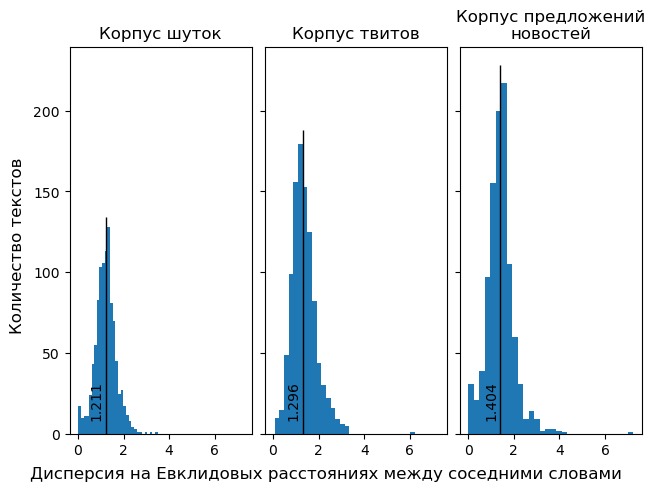

In [82]:
# Дисперсия. По 1001 текстов

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='all', sharey='all', constrained_layout=True)

ax1.hist(jokes_slice_df['variation'], bins=30)
ymin, ymax = ax1.get_ylim()
jokes_var_median = jokes_slice_df['variation'].median()
ax1.vlines(x = jokes_var_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax1.text(0.5, 10, str(round(jokes_var_median, 3)), color='black', rotation=90)
ax1.set_title('Корпус шуток')

ax2.hist(tweets_slice_df['variation'], bins=30)
ymin, ymax = ax2.get_ylim()
tweets_var_median = tweets_slice_df['variation'].median()
ax2.vlines(x = tweets_var_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax2.text(0.6, 10, str(round(tweets_var_median, 3)), color='black', rotation=90)
ax2.set_title('Корпус твитов')

ax3.hist(news_sents_slice_df['variation'], bins=30)
ymin, ymax = ax3.get_ylim()
news_sents_var_median = news_sents_slice_df['variation'].median()
ax3.vlines(x = news_sents_var_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax3.text(0.7, 10, str(round(news_sents_var_median, 3)), color='black', rotation=90)
ax3.set_title('Корпус предложений\nновостей')

fig.supxlabel('Дисперсия на Евклидовых расстояниях между соседними словами')
fig.supylabel('Количество текстов')

plt.show()

In [78]:
# Дисперсия. По 1001 текстов

jokes_var = jokes_slice_df.variation.values[:-1]
tweets_var = tweets_slice_df.variation.values[:-1]
news_sents_var = news_sents_slice_df.variation.values
news_sents_var = news_sents_var[~np.isnan(news_sents_var)]
print("Критерий Вилкоксона")
print(f"- шутки vs. твиты, p-value={wilcoxon(jokes_var, tweets_var)[1]}")
print(f"- шутки vs. предложения новостей, p-value={wilcoxon(jokes_var, news_sents_var)[1]}")
print(f"- твиты vs. предложения новостей, p-value={wilcoxon(tweets_var, news_sents_var)[1]}")

Критерий Вилкоксона
- шутки vs. твиты, p-value=3.1630939616179665e-09
- шутки vs. предложения новостей, p-value=4.543145830181029e-17
- твиты vs. предложения новостей, p-value=0.14944048938573676


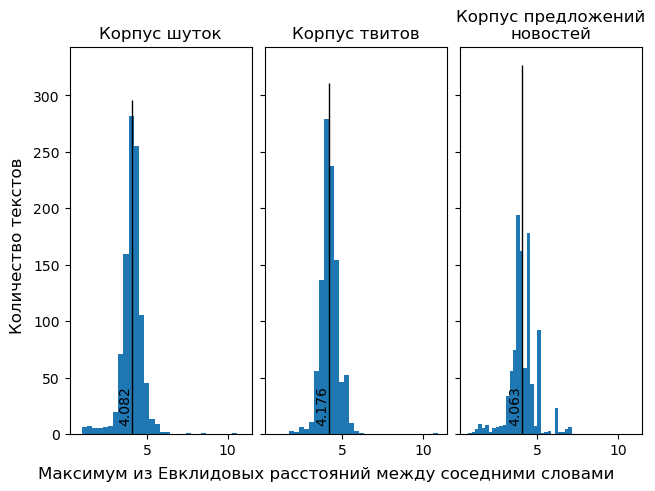

In [10]:
# Максимум. По 1001 текстов

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='all', sharey='all', constrained_layout=True)

ax1.hist(jokes_slice_df['max_dist'], bins=30)
ymin, ymax = ax1.get_ylim()
jokes_max_dist_median = jokes_slice_df['max_dist'].median()
ax1.vlines(x = jokes_max_dist_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax1.text(3.2, 10, str(round(jokes_max_dist_median, 3)), color='black', rotation=90)
ax1.set_title('Корпус шуток')

ax2.hist(tweets_slice_df['max_dist'], bins=30)
ymin, ymax = ax2.get_ylim()
tweets_max_dist_median = tweets_slice_df['max_dist'].median()
ax2.vlines(x = tweets_max_dist_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax2.text(3.3, 10, str(round(tweets_max_dist_median, 3)), color='black', rotation=90)
ax2.set_title('Корпус твитов')

ax3.hist(news_sents_slice_df['max_dist'], bins=30)
ymin, ymax = ax3.get_ylim()
news_sents_max_dist_median = news_sents_slice_df['max_dist'].median()
ax3.vlines(x = news_sents_max_dist_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax3.text(3.2, 10, str(round(news_sents_max_dist_median, 3)), color='black', rotation=90)
ax3.set_title('Корпус предложений\nновостей')

fig.supxlabel('Максимум из Евклидовых расстояний между соседними словами')
fig.supylabel('Количество текстов')

plt.show()

In [11]:
# Максимум. По 1001 текстов

jokes_max_dist = jokes_slice_df.max_dist.values[:-2]
tweets_max_dist = tweets_slice_df.max_dist.values[:-2]
news_sents_max_dist = news_sents_slice_df.max_dist.values
news_sents_max_dist = news_sents_max_dist[~np.isnan(news_sents_max_dist)]
print("Критерий Вилкоксона")
print(f"- шутки vs. твиты, p-value={wilcoxon(jokes_max_dist, tweets_max_dist)[1]}")
print(f"- шутки vs. предложения новостей, p-value={wilcoxon(jokes_max_dist, news_sents_max_dist)[1]}")
print(f"- твиты vs. предложения новостей, p-value={wilcoxon(tweets_max_dist, news_sents_max_dist)[1]}")

Критерий Вилкоксона
- шутки vs. твиты, p-value=9.632506270170852e-07
- шутки vs. предложения новостей, p-value=0.39464091076152485
- твиты vs. предложения новостей, p-value=1.6717794898509828e-05


## Обратный эксперимент на перемешанных корпусах шуток и не шуток на основе векторов word2vec

In [12]:
nonjokes_slice_df = pd.concat([tweets_slice_df, news_sents_slice_df], axis=0)
nonjokes_slice_df = nonjokes_slice_df.sample(frac=0.5)

In [13]:
shuffle_slice_df = pd.concat([jokes_slice_df, nonjokes_slice_df], axis=0)
shuffle_slice_df = shuffle_slice_df.sample(frac=1).reset_index(drop=True)
shuffle_slice_df_1 = shuffle_slice_df[:1001]
shuffle_slice_df_2 = shuffle_slice_df[1001:]

In [14]:
shuffle_slice_df_1["variation"] = shuffle_slice_df_1["preprocessed"].apply(text_distances_variation)
shuffle_slice_df_1["max_dist"] = shuffle_slice_df_1["preprocessed"].apply(text_distances_max)

shuffle_slice_df_2["variation"] = shuffle_slice_df_2["preprocessed"].apply(text_distances_variation)
shuffle_slice_df_2["max_dist"] = shuffle_slice_df_2["preprocessed"].apply(text_distances_max)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ttais\AppData\Local\Temp\ipykernel_3480\1030562954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffle_slice_df_1["variation"] = shuffle_slice_df_1["preprocessed"].apply(text_distances_variation)
C:\U

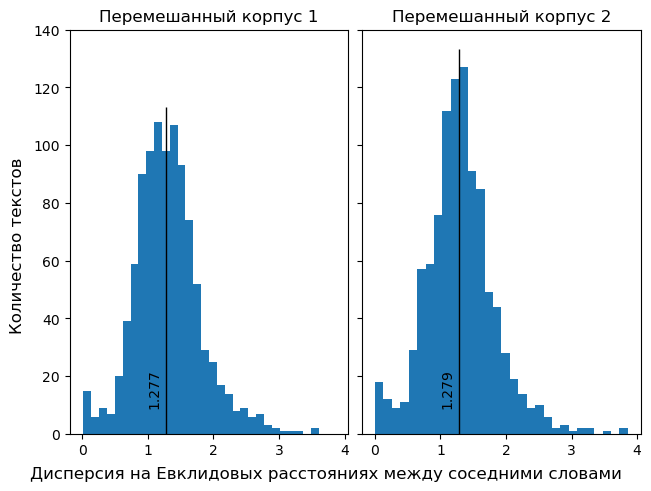

In [15]:
# Дисперсия. По 1001 текстов

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all', constrained_layout=True)

ax1.hist(shuffle_slice_df_1['variation'], bins=30)
ymin, ymax = ax1.get_ylim()
shuffle1_var_median = shuffle_slice_df_1['variation'].median()
ax1.vlines(x = shuffle1_var_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax1.text(1, 10, str(round(shuffle1_var_median, 3)), color='black', rotation=90)
ax1.set_title('Перемешанный корпус 1')

ax2.hist(shuffle_slice_df_2['variation'], bins=30)
ymin, ymax = ax2.get_ylim()
shuffle2_var_median = shuffle_slice_df_2['variation'].median()
ax2.vlines(x = shuffle2_var_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax2.text(1, 10, str(round(shuffle2_var_median, 3)), color='black', rotation=90)
ax2.set_title('Перемешанный корпус 2')

fig.supxlabel('Дисперсия на Евклидовых расстояниях между соседними словами')
fig.supylabel('Количество текстов')

plt.show()

In [16]:
# Дисперсия. По 1001 текстов

shuffle2_var = shuffle_slice_df_2.variation.values[:-1]
shuffle1_var = shuffle_slice_df_1.variation.values
shuffle1_var = shuffle1_var[~np.isnan(shuffle1_var)]
print("Критерий Вилкоксона")
print(f"- шутки vs. твиты, p-value={wilcoxon(shuffle1_var, shuffle2_var)[1]}")

Критерий Вилкоксона
- шутки vs. твиты, p-value=0.841341045442938


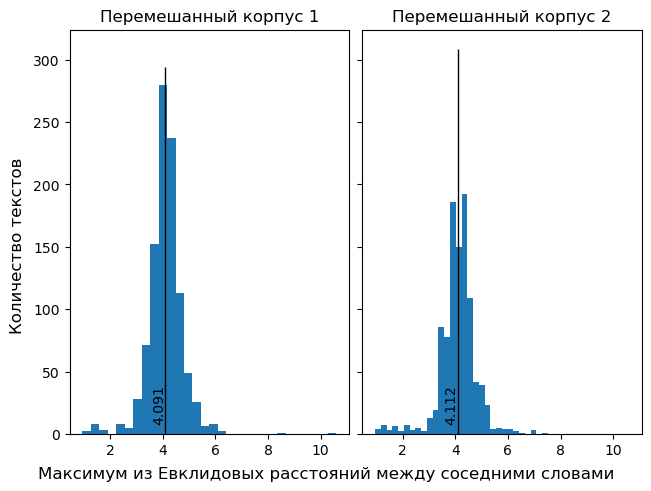

In [17]:
# Максимум. По 1001 текстов

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all', constrained_layout=True)

ax1.hist(shuffle_slice_df_1['max_dist'], bins=30)
ymin, ymax = ax1.get_ylim()
shuffle1_max_dist_median = shuffle_slice_df_1['max_dist'].median()
ax1.vlines(x = shuffle1_max_dist_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax1.text(3.6, 10, str(round(shuffle1_max_dist_median, 3)), color='black', rotation=90)
ax1.set_title('Перемешанный корпус 1')

ax2.hist(shuffle_slice_df_2['max_dist'], bins=30)
ymin, ymax = ax2.get_ylim()
shuffle2_max_dist_median = shuffle_slice_df_2['max_dist'].median()
ax2.vlines(x = shuffle2_max_dist_median, ymin=ymin, ymax=ymax, color='black', lw=1)
ax2.text(3.6, 10, str(round(shuffle2_max_dist_median, 3)), color='black', rotation=90)
ax2.set_title('Перемешанный корпус 2')

fig.supxlabel('Максимум из Евклидовых расстояний между соседними словами')
fig.supylabel('Количество текстов')

plt.show()

In [18]:
# Максимум. По 1001 текстов

shuffle2_max_dist = shuffle_slice_df_2.variation.values[:-1]
shuffle1_max_dist = shuffle_slice_df_1.max_dist.values
shuffle1_max_dist = shuffle1_max_dist[~np.isnan(shuffle1_max_dist)]
print("Критерий Вилкоксона")
print(f"- шутки vs. твиты, p-value={wilcoxon(shuffle1_max_dist, shuffle2_max_dist)[1]}")

Критерий Вилкоксона
- шутки vs. твиты, p-value=4.530900128565171e-165


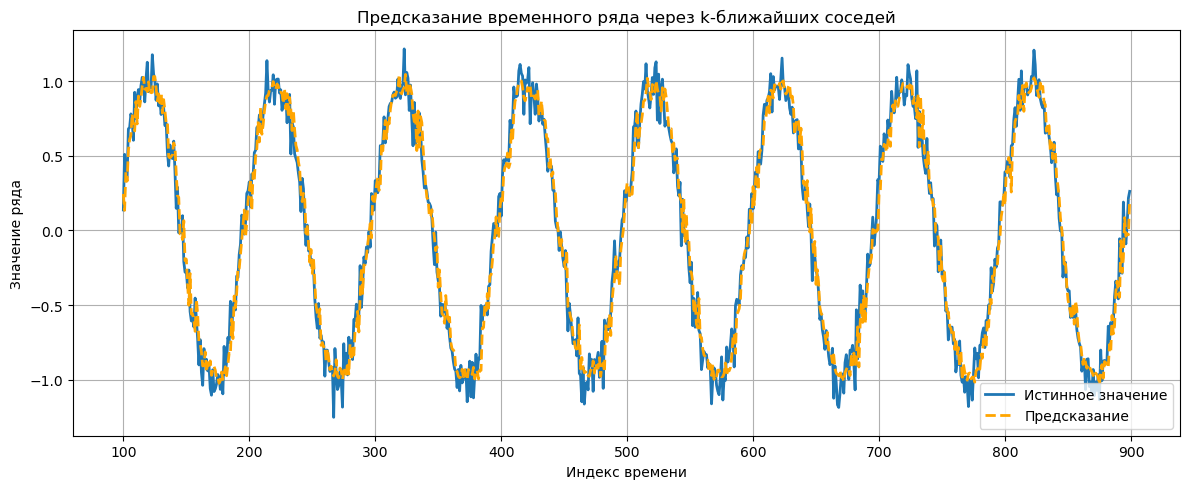

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# --- ПАРАМЕТРЫ ---
L = 4
pattern = [1, 2, 1]
k_neighbors = 10  # количество ближайших соседей для предсказания

# --- 1. СИНУСОИДА С ШУМОМ ---
np.random.seed(0)
t = np.linspace(0, 20 * np.pi, 1000)
series = np.sin(t) + 0.1 * np.random.randn(len(t))

# --- 2. ПОСТРОЕНИЕ Z-ВЕКТОРОВ ---
def generate_z_vectors(series, pattern):
    z_vectors = []
    targets = []
    indices = []
    max_offset = sum(pattern)
    for i in range(len(series) - max_offset - 1):
        idx = [i + sum(pattern[:j]) for j in range(L - 1)]
        target_idx = idx[-1] + pattern[-1]
        if target_idx < len(series):
            z = [series[k] for k in idx]
            z_vectors.append(z)
            targets.append(series[target_idx])
            indices.append(i)
    return np.array(z_vectors), np.array(targets), np.array(indices)

z_vectors, targets, indices = generate_z_vectors(series, pattern)

# --- 3. ОБУЧЕНИЕ МОДЕЛИ НА БЛИЖАЙШИХ СОСЕДЯХ ---
nn_model = NearestNeighbors(n_neighbors=k_neighbors).fit(z_vectors)

# --- 4. ПРЕДСКАЗАНИЕ ---
predicted = []
actual = []
used_indices = []

for i in range(100, 900):  # диапазон теста
    idx = [i + sum(pattern[:j]) for j in range(L - 1)]
    if max(idx) + pattern[-1] >= len(series):
        continue
    current_vector = np.array([series[k] for k in idx]).reshape(1, -1)
    target = series[max(idx) + pattern[-1]]

    distances, indices_nn = nn_model.kneighbors(current_vector)
    predicted_values = targets[indices_nn[0]]
    pred = np.mean(predicted_values)

    predicted.append(pred)
    actual.append(target)
    used_indices.append(i)

# --- 5. ВИЗУАЛИЗАЦИЯ ---
plt.figure(figsize=(12, 5))
plt.plot(used_indices, actual, label="Истинное значение", linewidth=2)
plt.plot(used_indices, predicted, label="Предсказание", linestyle='--', linewidth=2, color='orange')
plt.xlabel("Индекс времени")
plt.ylabel("Значение ряда")
plt.title("Предсказание временного ряда через k-ближайших соседей")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


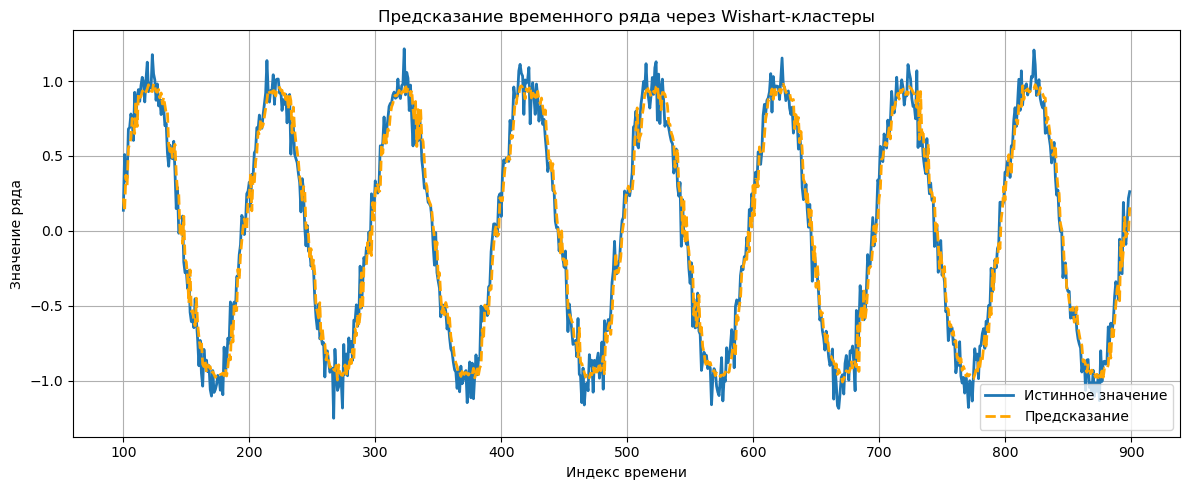

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
import networkx as nx

# --- ПАРАМЕТРЫ ---
L = 4
pattern = [1, 2, 1]
r = 11
mu = 0.2
eps = 0.2  # ε для сходства z-векторов при предсказании

# --- 1. СИНУСОИДА С ШУМОМ ---
np.random.seed(0)
t = np.linspace(0, 20 * np.pi, 1000)
series = np.sin(t) + 0.1 * np.random.randn(len(t))

# --- 2. Z-ВЕКТОРЫ ---
def generate_z_vectors(series, pattern):
    z_vectors, targets, indices = [], [], []
    max_offset = sum(pattern)
    for i in range(len(series) - max_offset - 1):
        idx = [i + sum(pattern[:j]) for j in range(L - 1)]
        target_idx = idx[-1] + pattern[-1]
        if target_idx < len(series):
            z = [series[k] for k in idx]
            z_vectors.append(z)
            targets.append(series[target_idx])
            indices.append(i)
    return np.array(z_vectors), np.array(targets), np.array(indices)

z_vectors, targets, indices = generate_z_vectors(series, pattern)

# --- 3. WISHART-КЛАСТЕРИЗАЦИЯ ---
def wishart_clustering(z_vectors, targets, r=11, mu=0.2):
    n = len(z_vectors)
    nbrs = NearestNeighbors(n_neighbors=r).fit(z_vectors)
    distances, _ = nbrs.kneighbors(z_vectors)
    Vr = distances[:, -1]
    p = r / (Vr ** L) / n

    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            d = euclidean(z_vectors[i], z_vectors[j])
            if d <= Vr[i]:
                G.add_edge(i, j)

    clusters = []

    for component in nx.connected_components(G):
        cluster = list(component)
        ps = p[cluster]
        if max(ps) - min(ps) >= mu:
            members = z_vectors[cluster]
            members_targets = targets[cluster]
            clusters.append((members, members_targets))

    return clusters

clusters = wishart_clustering(z_vectors, targets, r, mu)

# --- 4. ПРЕДСКАЗАНИЕ: ищем похожие z-векторы внутри кластеров ---
def predict_next_value(current_vector, clusters, eps):
    predictions = []
    for z_vecs, targets in clusters:
        for i, z in enumerate(z_vecs):
            if euclidean(current_vector, z) < eps:
                predictions.append(targets[i])
    return np.mean(predictions) if predictions else None

# --- 5. ПРЕДСКАЗАНИЯ ---
predicted = []
actual = []
used_indices = []

for i in range(100, 900):  # диапазон теста
    idx = [i + sum(pattern[:j]) for j in range(L - 1)]
    if max(idx) + pattern[-1] >= len(series):
        continue
    current_vector = np.array([series[k] for k in idx])
    target = series[max(idx) + pattern[-1]]
    pred = predict_next_value(current_vector, clusters, eps)
    if pred is not None:
        predicted.append(pred)
        actual.append(target)
        used_indices.append(i)

# --- 6. ВИЗУАЛИЗАЦИЯ ---
plt.figure(figsize=(12, 5))
plt.plot(used_indices, actual, label="Истинное значение", linewidth=2)
plt.plot(used_indices, predicted, label="Предсказание", linestyle='--', linewidth=2, color='orange')
plt.xlabel("Индекс времени")
plt.ylabel("Значение ряда")
plt.title("Предсказание временного ряда через Wishart-кластеры")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Другое

In [ ]:
ds = load_dataset("IgorVolochay/russian_jokes")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

dataset.txt:   0%|          | 0.00/41.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/150553 [00:00<?, ? examples/s]

In [ ]:
model_url = 'http://vectors.nlpl.eu/repository/20/199.zip'
m = wget.download(model_url)